# Data Science & ML Challenge for Eluvio 

Joachim Carvallo - 19/04/2021

**Context :** The dataset is tabular and the features involved should be self-explanatory. We would like for you to come up with a specific problem yourself and solve it properly. This is an “open challenge,” mainly focusing on natural language processing. The problem could be either about predictive modeling or providing analytical insights for some business use cases. Note the problem should be treated as large-scale, as the dataset is large (e.g., >100GB) and will not fit into the RAM of your machine. Python is strongly recommended in terms of the coding language.

## I. Data exploration:

Here, we will simply try to understand what the data at our disposal consists of. Then, we will choose a problem to try to solve. 

### Loading librairies and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [30]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/Eluvio DS Challenge/'
data = pd.read_csv(path + 'Eluvio_DS_Challenge.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(data.shape)
data.head(10)

(509236, 8)


,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews
5,1201287889,2008-01-25,15,0,Hay presto! Farmer unveils the illegal mock-...,False,Armagedonovich,worldnews
6,1201289438,2008-01-25,5,0,"Strikes, Protests and Gridlock at the Poland-U...",False,Clythos,worldnews
7,1201536662,2008-01-28,0,0,The U.N. Mismanagement Program,False,Moldavite,worldnews
8,1201558396,2008-01-28,4,0,Nicolas Sarkozy threatens to sue Ryanair,False,Moldavite,worldnews
9,1201635869,2008-01-29,3,0,US plans for missile shields in Polish town me...,False,JoeyRamone63,worldnews


We have 509,236 lines and 8 variables. Each row seems to represent an online newspaper article, however, we can't be sure about that. We have at our disposal: the title of the article, its date of publication, a variable that seems to indicate the time of publication more precisely (on the scale of hours or minutes), however, we are not sure how to decipher this information, the number of upvotes, the number of downvotes, the author of the article, its category and whether it is classified 'under 18 years old' or not. 

### A few statistics



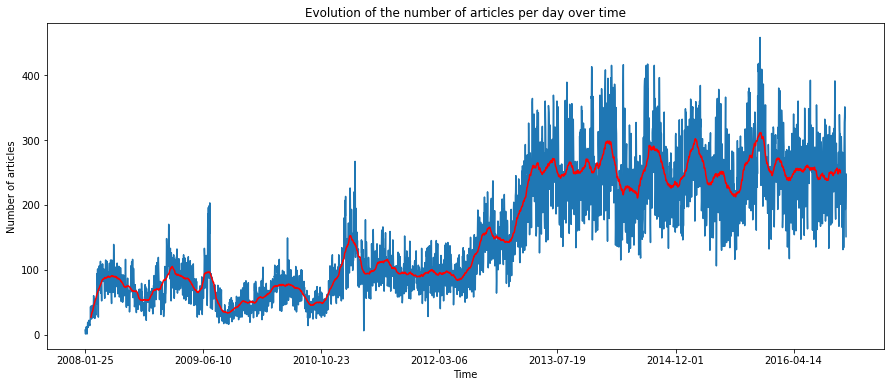

In [ ]:
count = data['date_created'].value_counts().sort_index()

plt.figure(figsize = (15,6))
count.plot()
count.rolling(window=50, center=True).mean().plot(c='red')
plt.title("Evolution of the number of articles per day over time")
plt.xlabel("Time")
plt.ylabel("Number of articles")
plt.show()


The observation period is from the beginning of 2008 to the end of 2016. We can see that the number of articles per day is relatively variable over the period. However, we observe a strong increase in the volume of articles between 2012 and 2013.


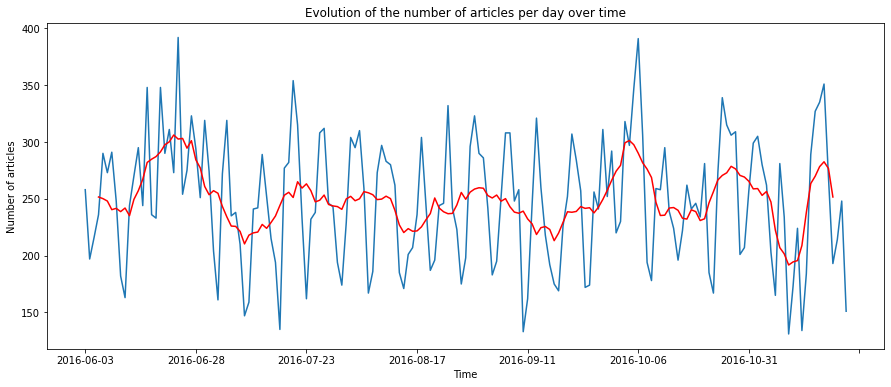

In [ ]:
plt.figure(figsize = (15,6))
count[3050:].plot()
count[3050:].rolling(window=7, center=True).mean().plot(c='red')
plt.title("Evolution of the number of articles per day over time")
plt.xlabel("Time")
plt.ylabel("Number of articles")
plt.show()

If we focus on the end of the previous graph, we can observe that part of the variability is explained by seasonality at the week level (which is essentially eliminated by a moving average of size 7, here in red).

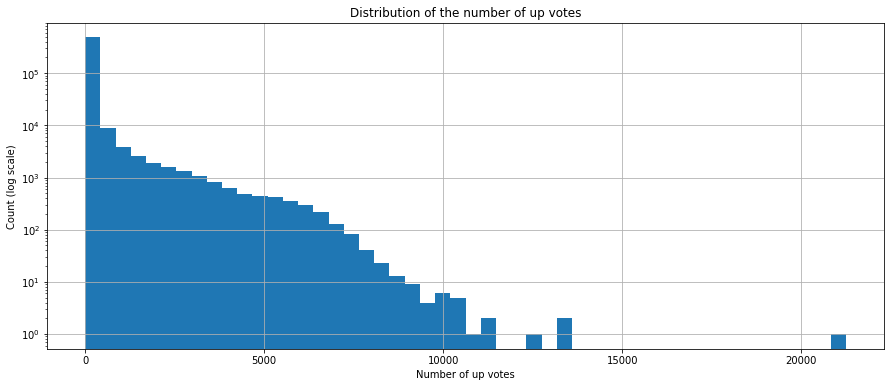

In [ ]:
plt.figure(figsize = (15,6))
data['up_votes'].hist(bins = 50)
plt.yscale('log')
plt.title("Distribution of the number of up votes")
plt.xlabel("Number of up votes")
plt.ylabel("Count (log scale)")
plt.show()

Here we see that the volume of articles decreases exponentially with the number of upvotes (the count is in logarithmic scale). We also have a very large number of articles close to zero and an extreme, isolated article with more than 22,000 upvotes.  

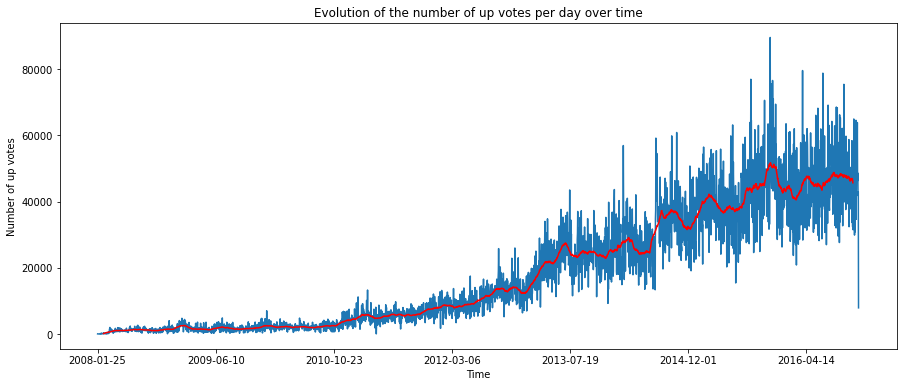

In [ ]:
up_vote_count_by_day = data.groupby('date_created')['up_votes'].agg('sum')

plt.figure(figsize = (15,6))
up_vote_count_by_day.plot()
up_vote_count_by_day.rolling(window=50, center=True).mean().plot(c='red')
plt.title("Evolution of the number of up votes per day over time")
plt.xlabel("Time")
plt.ylabel("Number of up votes")
plt.show()

We can also see that the number of upvotes distributed each day grows strongly over time, starting at values close to zero between 2008 and 2010, and reaching about 50,000 upvotes per day in 2016.

In [ ]:
print(data['down_votes'].value_counts())
print(data['category'].value_counts())

0    509236
Name: down_votes, dtype: int64
worldnews    509236
Name: category, dtype: int64


In [ ]:
data = data.drop(columns=['down_votes', 'category'])

The variables 'down_votes' and 'category' take only one value, thus, they do not provide any information. We eliminate them from the data. 

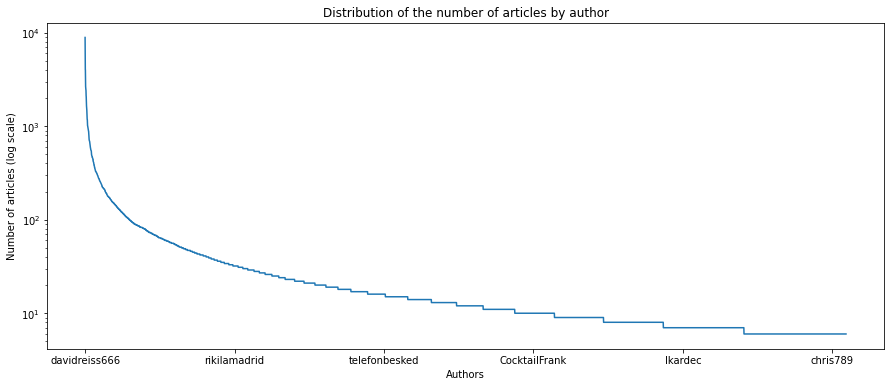

In [ ]:
count = data['author'].value_counts()

plt.figure(figsize = (15,6))
count[count > 5].plot()
plt.yscale('log')
plt.title("Distribution of the number of articles by author")
plt.xlabel("Authors")
plt.ylabel("Number of articles (log scale)")
plt.show()

The number of articles per author is very unevenly distributed: a small number of authors produced the majority of articles and a large number of authors produced only a few articles. 

In [ ]:
print("Number of articles prohibited to under 18 years old: {}".format(sum(data['over_18'])))
data['over_18'].value_counts() * 100 / len(data)

Number of articles prohibited to under 18 years old: 320


False    99.937161
True      0.062839
Name: over_18, dtype: float64

We only have 320 articles classified 'under 18 years old', which represents only 0.063% of our data or 1 article out of 1591.

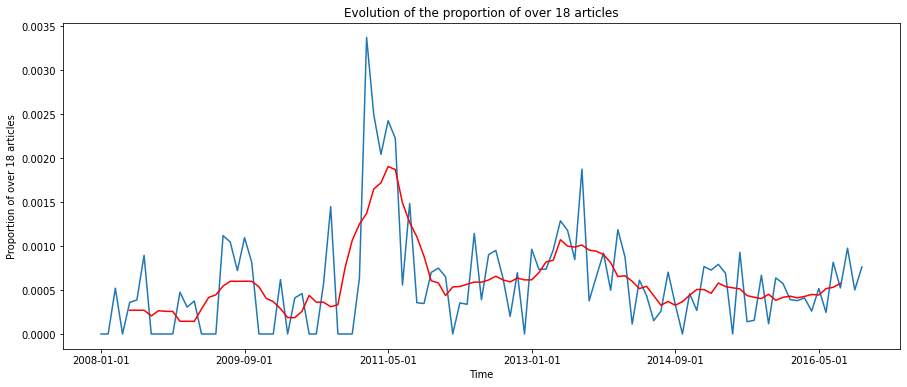

In [ ]:
data['date_created_month'] = data['date_created'].apply(lambda x: x[:8] + '01')
proportion_of_over_18_by_month = data.groupby('date_created_month')['over_18'].agg('mean')

plt.figure(figsize = (15,6))
proportion_of_over_18_by_month.plot()
proportion_of_over_18_by_month.rolling(window=8, center=True).mean().plot(c='red')
plt.title("Evolution of the proportion of over 18 articles")
plt.xlabel("Time")
plt.ylabel("Proportion of over 18 articles")
plt.show()

If we look at the proportion of articles classified as 'under 18' over time, there is no clear trend that emerges. However, we can see an important peak in the middle of 2011. 

Here are the first ten titles of articles classified as 'under 18':

In [ ]:
for i, title in enumerate(data['title'][data['over_18']][0:10]):
    print("{}: {}\n".format(i+1, title))

1: Pics from the Tibetan protests - more graphic than Wikileaks [nsfw? graphic]

2: MI5 linked to Max Mosley’s Nazi-style, sadomasochistic sex orgy. Mosley’s father led the British Union of Fascists in the 30s and 40s. His mother was a great admirer of Adolf Hitler.[NSFW]

3: Tabloid Horrifies Germany: Poland s Yellow Press Turns Blood Red (if you follow the link to the gallery: 4th picture is NSFW in the US)

4: Love Parade Dortmund: Techno Festival Breaks Record with 1.6 Million (with a 90x90 px NSFW thumbnail)

5: IDF kills young Palestinian boy. Potentially NSFW.

6: In pictures: Gaza Massacre (Graphic!  possibly NSFW)

7: In Pictures: the slaughter of Gazan children Victims of the Israeli occupation forces in the tenth day of their attacks on Gaza Strip.  (Graphic!  NSFW?)

8: Eye-Opening Montage about the Gaza Massacre (NSFW)

9: NSFW: Taliban Barbers Frequently Sever Customer s Heads 

10: Famous Russian Female Body Guard Killed in Carjacking [Semi-NSFW Photos]



We can see that they all contain the words 'NSFW', another version of this seem to be 'NSFL'. We are going to check whether or not it is always true. 

In [ ]:
import torchtext
from torchtext.data import get_tokenizer
tokenizer = get_tokenizer("basic_english")
import re 

# Extract and tokenize the 'over 18' titles.
over_18_titles = []
for i, title in enumerate(data['title'][data['over_18']]):
    tokens = tokenizer(title)
    over_18_titles.append(tokens)

# Check if there is a 'NSFW'.
is_there_nsf = np.repeat(False, len(over_18_titles))
for i, title in enumerate(over_18_titles):
    for word in title:
        if re.search("nsfw", word) or re.search("nsfl", word):
            is_there_nsf[i] = True
            break

print(np.sum(is_there_nsf))

148


171 out of 320 do not have this mention. Let's look at a few of these titles:


In [ ]:
for i, title in enumerate(data['title'][data['over_18']][~is_there_nsf][:10]):
    print("{}: {}\n".format(i+1, title))

1: BBC News - Phone hacking: Brooks steps down over phone hacking

2: Tragic story - How the Thai army deals with deserters. Warning - graphic pictures inside.

3: Syria s government takes the kid gloves off, violently cracking down on protestors. [videos]

4: [VIDEO]: Start of the London riots - 16 year-old girl beaten by riot police

5: Bahrain: Shouting in the Dark

6: 53 bodies discovered in southern Tripoli, apparently 
executed by retreating Gaddafi forces.

7: Seychelles shark attack: victim’s widow heartfelt tribute at the funeral. | BelleNews.com

8: Footage shows Gaddafi s bloodied body - Middle East - Al Jazeera English

9: Hundreds of Chinese netizens strip in support of artist Ai Weiwei after porn probe

10: Spell of the Albino - Investigating the sinister trade in the body parts of murdered albinos in Tanzania.  - Short Al Jazeera Doc.




Now, let's check that normal articles do not have these mentions:


In [ ]:
not_over_18_titles = []
is_there_nsf = np.repeat(False, np.sum(~data['over_18']))

# Go through every title that are not 'over 18' and check if there is 'nsfw' or 'nsfl'.
for i, title in enumerate(data['title'][~data['over_18']]):
    tokens = tokenizer(title)
    not_over_18_titles.append(tokens)
    
    for word in tokens:
            if re.search("nsfw", word) or re.search("nsfl", word):
                is_there_nsf[i] = True
                break

In [ ]:
np.sum(is_there_nsf)

0

So, it seems that we can identify with a lot of confidence a good part of the 'over 18' items just by this mention.


Now we can look at the most frequent words in the article titles, with a word cloud:


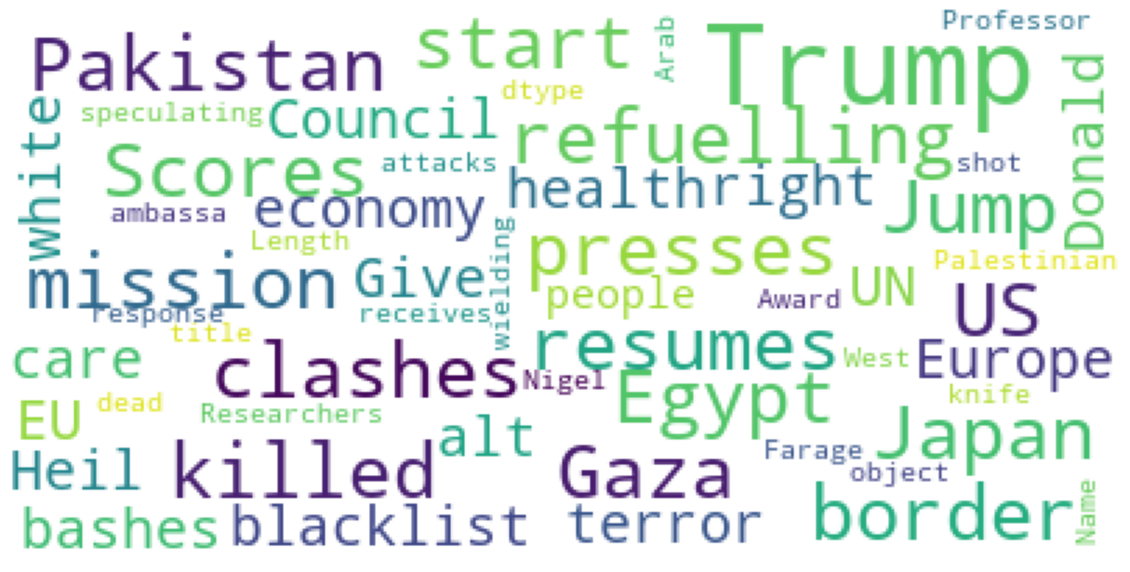

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#Create a word cloud
stopwords1 = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords1, max_words=500,
                      max_font_size=40, random_state=42).generate(str(data['title']))
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

These words seem quite consistent with the category of these articles: worldnews.

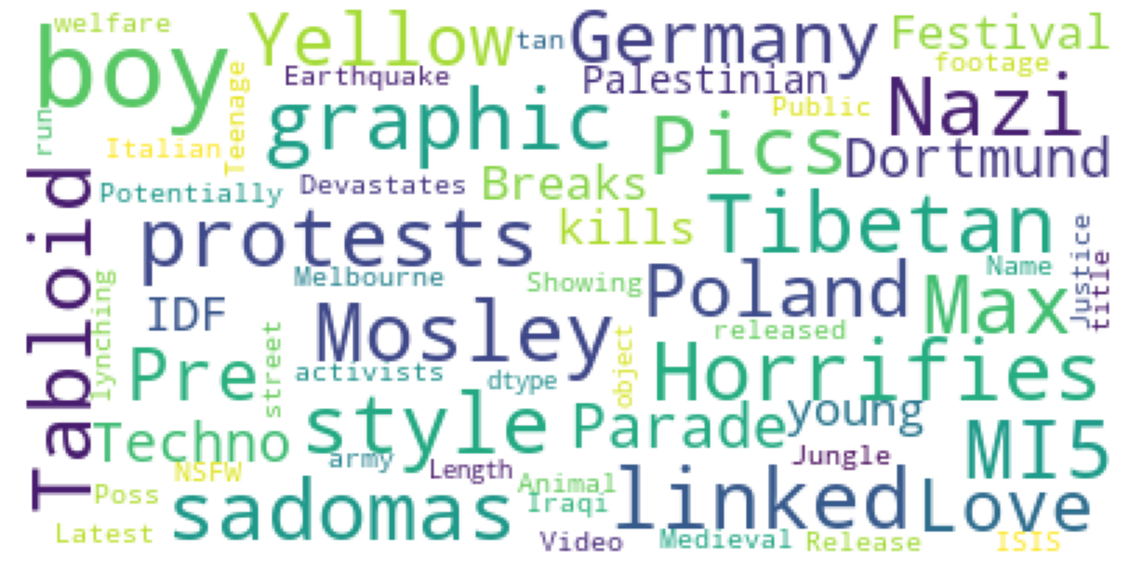

In [ ]:
#Create a word cloud
stopwords1 = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords1, max_words=500,
                      max_font_size=40, random_state=42).generate(str(data['title'][data['over_18']]))
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

These words also seem quite consistent with what one might imagine from violent 'worldnews' type articles. 

After these few statistics, we can consider several interesting tasks. We decided to try to produce a detector for articles with shocking content (forbidden to under 18 years old) from the title of this one. 

## II. Shocking content detector:

To produce such a detector, two main approaches are possible. The first is to approach it as a binary classification problem with two very unbalanced classes. The second is to consider this problem as an anomaly detection task. We will focus on the first approach, however, it would be appropriate to try and compare the two approaches if more time were available. We will use the area under the ROC curve as a metric for comparing our models.


### Split train, validation and test

We start by dividing our data in three, to train, compare and then evaluate our models (with a 50/25/25 % ratio).

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['title'], data['over_18'], test_size=0.5, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

data_train = data.iloc[X_train.index,:]
data_valid = data.iloc[X_valid.index,:]
data_test = data.iloc[X_test.index,:]

In [ ]:
# Save our datasets as csv files.
data_train.to_csv(path + 'Eluvio_DS_Challenge_train.csv')
data_valid.to_csv(path + 'Eluvio_DS_Challenge_valid.csv')
data_test.to_csv(path + 'Eluvio_DS_Challenge_test.csv')

### First experiments

We start with a very simple approach to see what it can do : a TF-IDF to extract the features of each title, and then different classifiers to predict the probability that an article is shocking. At this stage, we do not yet take into account the possibility that the dataset is too large to be loaded entirely on the RAM, because we are using simple models. 

In [ ]:
# Load librairies.
import gensim
import nltk
from sklearn.feature_extraction import stop_words
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# Download the stop-words of the librairies nltk, sklearn and gensim to combine them.
nltk.download("stopwords")
nltk.download('punkt')

nltk_stopwords = nltk.corpus.stopwords.words('english')
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS
sklearn_stopwords = stop_words.ENGLISH_STOP_WORDS
combined_stopwords = sklearn_stopwords.union(nltk_stopwords,gensim_stopwords)

porter_stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Put the titles in lower case.
data_train['title'] = data_train['title'].apply(lambda x: x.lower())

# Split the title into a list of words.
data_train['title'] = data_train['title'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))

# Remove morphological affixes from words, leaving only the word stem.
data_train['title'] = data_train['title'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

# Suppress stop-words 
data_train['title'] = data_train['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

# Then do the same for our validation set
data_valid['title'] = data_valid['title'].apply(lambda x: x.lower())
data_valid['title'] = data_valid['title'].apply(lambda x: ' '.join([word for word in x.split() if word.isalpha()]))
data_valid['title'] = data_valid['title'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
data_valid['title'] = data_valid['title'].apply(lambda x: ' '.join([word for word in x.split() if word not in (combined_stopwords)]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
# Transforme our usefull data into np.arrays.
x_train = np.array(data_train['title'])[1:]
y_train = np.array(data_train['over_18'])[1:].astype(bool)
x_valid = np.array(data_valid['title'])[1:]
y_valid = np.array(data_valid['over_18'])[1:].astype(bool)

In [ ]:
# Apply TF-IDF to our titles.
tfidf_vectorizer = TfidfVectorizer(tokenizer = word_tokenize, max_features = 100)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_valid = tfidf_vectorizer.transform(x_valid)

In [ ]:
# Train our models on the TF-IDF features.
lr = LogisticRegression()
dt = DecisionTreeClassifier() 
rf = RandomForestClassifier()

print('Fiting logistic regression...')
lr.fit(tfidf_train, y_train)
print('Fiting decision tree...')
dt.fit(tfidf_train, y_train)
print('Fiting random forest...')
rf.fit(tfidf_train, y_train)

Fiting logistic regression...
Fiting decision tree...
Fiting random forest...


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predict on validation data and compute AUC ROC.
pred_lr = lr.predict_proba(tfidf_valid)
print("Validation AUC ROC of Logistic Regression: {}".format( roc_auc_score(y_valid, pred_lr[:,1]) ))

pred_dt = dt.predict_proba(tfidf_valid)
print("Validation AUC ROC of Decision Tree: {}".format( roc_auc_score(y_valid, pred_dt[:,1]) ))

pred_rf = rf.predict_proba(tfidf_valid)
print("Validation AUC ROC of Random Forest: {}".format( roc_auc_score(y_valid, pred_rf[:,1]) ))

Validation AUC ROC of Logistic Regression: 0.7291106838398814
Validation AUC ROC of Decision Tree: 0.5920248050804829
Validation AUC ROC of Random Forest: 0.5883641176830722


The best performing model is logistic regression with an AUC ROC of 0. We will not optimize the hyperparameters of our models due to lack of time. 

### Pre-trained BERT for feature extraction 

Now, let's try to use a pre-trained transformer to extract a better quality representation of our titles than the one proposed by TF-IDF. Transformers are very often state-of-the-art for all NLP tasks. For this, we will use the library "🤗 Transformers".  

In [ ]:
# Install transformers library.
!pip install transformers

# Load librairies.
import transformers
from transformers import pipeline
from tqdm.notebook import tqdm

In [ ]:
# We use the pipeline function to extract features from text.
feature_extractor = pipeline("feature-extraction")

In [ ]:
# We can't tranform our full dataset at one because of RAM limitations,
# We will do it piece by piece. 

def extract_features(data, feature_extractor, n):

    data = data.reset_index()
    data_features = np.array(feature_extractor(data['title'][0])).mean(axis = 1)

    for i in tqdm(range(len(data) // n + 1)):
        data_features = np.vstack((data_features, np.array(feature_extractor(list(data['title'][i*n+1:min((i+1)*n+1, len(data))]))).mean(axis = 1)))

    return data_features

In [ ]:
# Tranform our train and validation data and save it. 
train_features = extract_features(data_train, feature_extractor, 1000)
np.save(path + 'train_feature_extracted.npy', train_features)
valid_features  = extract_features(data_valid, feature_extractor, 1000)
np.save(path + 'valid_feature_extracted.npy', valid_features)

In [ ]:
# Re-load the transformed data is necessary 
train_features = np.load(path + 'train_feature_extracted.npy')
valid_features = np.load(path + 'valid_feature_extracted.npy')

# Prepare the labels. 
y_train = np.array(data_train['over_18'])[0:].astype(bool)
y_valid = np.array(data_valid['over_18'])[0:].astype(bool)

In [ ]:
# Train our models on the BERT features.
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

print('Fiting logistic regression...')
lr.fit(train_features, y_train)
print('Fiting decision tree...')
dt.fit(train_features, y_train)
print('Fiting random forest...')
rf.fit(train_features, y_train)

Fiting logistic regression...


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Fiting decision tree...
Fiting random forest...


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# Predict on validation data and compute AUC ROC.
pred_lr = lr.predict_proba(valid_features)
print("Validation AUC ROC of Logistic Regression: {}".format( roc_auc_score(y_valid, pred_lr[:,1]) ))

pred_dt = dt.predict_proba(valid_features)
print("Validation AUC ROC of Decision Tree: {}".format( roc_auc_score(y_valid, pred_dt[:,1]) ))

pred_rf = rf.predict_proba(valid_features)
print("Validation AUC ROC of Random Forest: {}".format( roc_auc_score(y_valid, pred_rf[:,1]) ))

Validation AUC ROC of Logistic Regression: 0.8759805363305697
Validation AUC ROC of Decision Tree: 0.49956379241234583
Validation AUC ROC of Random Forest: 0.5922825694426347


In [ ]:
# Save our results.
np.save(path + 'pred_lr_bert.npy', pred_lr)
np.save(path + 'pred_dt_bert.npy', pred_dt)
np.save(path + 'pred_rf_bert.npy', pred_rf)

Again, logistic regression performs best. But, with these new features, we obtain an AUC ROC of 0.8, which is clearly better than with TF-IDF. 

### Pre-trained BERT fine-tuned for our task 
Now we can try to fine-tune our Transformers to further improve performance. This part partially rely on the following tutorial by George Mihaila: https://gmihaila.medium.com/fine-tune-transformers-in-pytorch-using-transformers-57b40450635 

In [ ]:
# Load librairies.
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (AutoConfig, AutoModelForSequenceClassification, AutoTokenizer, AdamW, get_linear_schedule_with_warmup, set_seed)
import transformers

We first define some important parameters for the following. 

In [ ]:
set_seed(123) # Set seed for reproducibility
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # Look for gpu to use. Will use `cpu` by default if no gpu found.

epochs = 15 # Number of training epochs
batches = 64
max_length = 100 # Pad or truncate text sequences to a specific length
load_size = 64000 # Number of lines to be loaded to memory at the same time 
load_fine_thuned_model = True # Do we loading an already fine-tuned model ?

# Name of transformers model - will use already pretrained model.
# Path of transformer model - will load your own model from local disk.
model_name_or_path = 'bert-base-cased'

# How many labels are we using in training.
# This is used to decide size of classification head.
n_labels = 2

We define a Dataset class in order to load the data at our disposal in the classical PyTorch format for datasets. Here, we take into account the possibility that not all data can be loaded on the RAM at the same time, using a parameter defining the number of data lines that can be loaded at the same time. 

In [ ]:
class EluvioDataset(Dataset):
    """ PyTorch Dataset class for loading Eluvio data.
    Arguments:
      path (:obj:`str`):
          Path to the data partition.
      tokenizer (:obj:`transformers.tokenization_?`):
          Transformer type tokenizer used to process raw text into numbers.
      load_size (:obj:`int`):
          Size of the sub-database that is loaded into the memory. 
      max_sequence_len (:obj:`int`, `optional`)
          Value to indicate the maximum desired sequence to truncate or pad text
          sequences. If no value is passed it will used maximum sequence size
          supported by the tokenizer and model.
      len_full_data (:obj:`int`, `optional`)
          Size of the full database. 
    """

    def __init__(self, path, tokenizer, load_size, max_sequence_len=None, len_full_data = 254618, train = True, oversampling_proba = 0.05):

        self.path = path
        self.start_idx = 0
        self.load_size = load_size
        self.max_sequence_len = max_sequence_len
        self.len_full_data = len_full_data
        self.train = train
        self.oversampling_proba = oversampling_proba
        
        # Load part of the data to the RAM.
        part_data = pd.read_csv(self.path, skiprows = self.start_idx+1, nrows = self.load_size, usecols = [4,5], names = ['title','over_18'])
        part_data = part_data.append({'title':"a "*self.max_sequence_len, 'over_18':False}, ignore_index=True)
        self.inputs = tokenizer(list(part_data['title']), add_special_tokens=True, truncation=True, padding=True, return_tensors='pt',  max_length=max_sequence_len)
        # Add labels.
        self.inputs.update({'labels':torch.tensor(part_data['over_18'])})
        # Suppress last observation that was used to fix the length of the sequences.
        for key in self.inputs.keys():
            self.inputs[key] = self.inputs[key][:-1]
        return

    def __len__(self):
        """ Return the number of examples.
        """
        return self.len_full_data    

    def __getitem__(self, idx):
        """ Given an index return an example from the position.
        Arguments:
          item (:obj:`int`):
              Index position to pick an example to return.
        Returns:
          :obj:`Dict[str, object]`: Dictionary of inputs that feed into the model.
          It holddes the statement `model(**Returned Dictionary)`.
        """

        # If the index is not in the data already loaded on the RAM, we load a new data block. 
        if (idx < self.start_idx) or (idx >= self.start_idx + self.load_size):

            self.start_idx = (idx // self.load_size) * self.load_size
            # Load part of the data to the RAM.
            part_data = pd.read_csv(self.path, skiprows = self.start_idx+1, nrows = self.load_size, usecols = [4,5], names = ['title','over_18'])
            part_data = part_data.append({'title':"a "*self.max_sequence_len, 'over_18':False}, ignore_index=True)
            self.inputs = tokenizer(list(part_data['title']), add_special_tokens=True, truncation=True, padding=True, return_tensors='pt',  max_length=self.max_sequence_len)
            # Add labels.
            self.inputs.update({'labels':torch.tensor(part_data['over_18'])})
            # Suppress last observation that was used to fix the length of the sequences
            for key in self.inputs.keys():
                self.inputs[key] = self.inputs[key][:-1]
            
        # If in training mode, with probability 'oversampling_proba', return a random positive observation.
        if self.train :
            if (np.random.rand() < self.oversampling_proba) and (self.inputs['labels'].sum() > 0) :
                idx = np.random.randint(low=0, high=self.inputs['labels'].sum(), size = 1)
                return {key: self.inputs[key][self.inputs['labels']][idx][0] for key in self.inputs.keys()}
                
        return {key: self.inputs[key][idx % self.load_size] for key in self.inputs.keys()}

Then, we define a 'train' function that perform a training iteration on the all dataset. 

In [ ]:
def train(dataloader, optimizer_, scheduler_, device_, log_interval = 100):
    """
    Train pytorch model on a single pass through the data loader.
    Arguments:
        dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
            Parsed data into batches of tensors.
        optimizer_ (:obj:`transformers.optimization.AdamW`):
            Optimizer used for training.
        scheduler_ (:obj:`torch.optim.lr_scheduler.LambdaLR`):
            PyTorch scheduler.
        device_ (:obj:`torch.device`):
            Device used to load tensors before feeding to model.
        log_interval (:obj:`int`, `optional`)
            Interval of batches between each log. 
    Returns:
        :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
          Labels, Train Average Loss].
    """
    # Use global variable for model.
    global model

    # Tracking variables.
    predictions_logits = []
    true_labels = []
    # Total loss for this epoch.
    total_loss = 0

    # Put the model into training mode.
    model.train()

    for batch_idx, batch in enumerate(tqdm(dataloader, total=len(dataloader))):

        # Add original labels - use later for evaluation.
        true_labels += batch['labels'].numpy().flatten().tolist()
        batch_labels = batch['labels'].type(torch.long) .to(device)
        batch.pop('labels', None)

        # move batch to device
        batch = {k:v.type(torch.long).to(device) for k,v in batch.items()}
            
        # Clear any previously calculated gradients :
        model.zero_grad()

        # Forward pass (This directly return the loss because we have provided the `labels`).
        logits = model(**batch)[0]

        # Compute loss.
        loss = criterion(logits, batch_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. 
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

        # Move logits to CPU
        logits = logits[:,0].detach().cpu().numpy()
        
        predictions_logits += logits.tolist()

        if batch_idx % log_interval == 0:
            print('[{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(batch_idx * len(batch_labels), len(dataloader.dataset), 100. * batch_idx / len(dataloader), loss.item()))
            model.save_pretrained(path)
    # Calculate the average loss over the training data.
    avg_epoch_loss = total_loss / len(dataloader)
    
    # Return all true labels and prediction for future evaluations.
    return true_labels, predictions_logits, avg_epoch_loss

Here, we define a 'validation' function that test our model on the validation dataset.

In [ ]:
def validation(dataloader, device_):
    """Validation function to evaluate model performance on a separate set of data.
    This function will return the true and predicted labels so we can use later to evaluate the model's performance.
    Arguments:
      dataloader (:obj:`torch.utils.data.dataloader.DataLoader`):
            Parsed data into batches of tensors.
      device_ (:obj:`torch.device`):
            Device used to load tensors before feeding to model.
    Returns:
      :obj:`List[List[int], List[int], float]`: List of [True Labels, Predicted
          Labels, Train Average Loss]
    """

    # Use global variable for model.
    global model

    # Tracking variables
    predictions_logits = []
    true_labels = []
    #total loss for this epoch.
    total_loss = 0

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Evaluate data for one epoch
    for batch in tqdm(dataloader, total=len(dataloader)):

        # Add original labels - use later for evaluation.
        true_labels += batch['labels'].numpy().flatten().tolist()
        batch_labels = batch['labels'].type(torch.long) .to(device)
        batch.pop('labels', None)

        # move batch to device
        batch = {k:v.type(torch.long).to(device_) for k,v in batch.items()}

        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass (This directly return the loss because we have provided the `labels`).
            logits = model(**batch)[0]

            # Compute loss.
            loss = criterion(logits, batch_labels)
            
            # Move logits to CPU
            logits = logits[:,0].detach().cpu().numpy()

            total_loss += loss.item()

            predictions_logits += logits.tolist()

    # Calculate the average loss over the training data.
    avg_epoch_loss = total_loss / len(dataloader)
    
    # Return all true labels and prediciton for future evaluations.
    return true_labels, predictions_logits, avg_epoch_loss

We load the pre-trained BERT text classifier, our a already fine-tuned version of it.

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Eluvio DS Challenge/' 

# Loading either an already fine-tuned model or a simply pre-trained model.
if load_fine_thuned_model :
    # Get model configuration.
    model_config = AutoConfig.from_pretrained(pretrained_model_name_or_path=path + 'config.json' , num_labels=n_labels)

    # Get model's tokenizer.
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)

    # Get the actual model.
    model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=path + 'pytorch_model.bin', config=model_config)

    # Load model to defined device.
    model.to(device) 
else : 
    # Get model configuration.
    model_config = AutoConfig.from_pretrained(pretrained_model_name_or_path=model_name_or_path,num_labels=n_labels)

    # Get model's tokenizer.
    tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_name_or_path)

    # Get the actual model.
    model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_name_or_path, config=model_config)

    # Load model to defined device.
    model.to(device)

We load the data with our class EluvioDataset.

In [ ]:
train_dataset = EluvioDataset(path + 'Eluvio_DS_Challenge_train.csv', tokenizer, load_size = load_size, 
                              max_sequence_len=max_length, len_full_data = 254618, train = True, oversampling_proba = 0.3)
train_dataloader = DataLoader(train_dataset, batch_size=batches, shuffle=False)

valid_dataset = EluvioDataset(path + 'Eluvio_DS_Challenge_valid.csv', tokenizer, load_size = load_size, 
                              max_sequence_len=max_length, len_full_data = 127309, train = False, oversampling_proba = None)
valid_dataloader = DataLoader(valid_dataset, batch_size=batches, shuffle=False)

We define our optimizer, our scheduler for the learning rate and our losses.

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
optimizer = AdamW(model.parameters())

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 100, num_training_steps = total_steps)

# Define loss function.
criterion = torch.nn.CrossEntropyLoss() # weight=torch.tensor([320.,509236.]).to(device))

# Store the average loss after each epoch so we can plot them.
all_loss = {'train_loss':[], 'train_roc':[], 'val_loss':[], 'val_roc':[]}

Finaly, we launch the training.

In [ ]:
# Loop through each epoch.
print('Epoch')
for epoch in tqdm(range(epochs)):

    # Perform one full pass over the training set.
    train_labels, train_logits, train_loss = train(train_dataloader, optimizer, scheduler, device)

    # Get prediction form model on validation data. 
    valid_labels, valid_logits, val_loss = validation(valid_dataloader, device)

    # Compute AUC ROC on train and validation data.
    train_roc = roc_auc_score(train_labels, torch.sigmoid(torch.tensor(train_logits)))
    val_roc = roc_auc_score(valid_labels, torch.sigmoid(torch.tensor(valid_logits)))

    # Print loss and AUC ROC values to see how training evolves.
    print("train_loss: %.5f - train_roc: %.5f - val_loss: %.5f - val_roc: %.5f \n"%(train_loss, train_roc, val_loss, val_roc))

    # Store the loss value for plotting the learning curve.
    all_loss['train_loss'].append(train_loss)
    all_loss['train_roc'].append(train_roc)
    all_loss['val_loss'].append(val_loss)
    all_loss['val_roc'].append(val_roc)

    # Save model.
    if (len(all_loss['val_loss']) == 1):
        model.save_pretrained(path)
        saved_loss = all_loss['val_loss'][-1]
    elif (saved_loss > all_loss['val_loss'][-1]):
        model.save_pretrained(path)
        saved_loss = all_loss['val_loss'][-1]
    #else:
        #break 

We will finally not train this model because of lack of time (these trainings are very long and demanding in calculations).  

In [ ]:
# Plot loss curves.
plt.figure(figsize=(15,8))
plt.plot(np.arange(len(all_loss['train_loss'])), all_loss['train_loss'], label = 'Train Loss')
plt.plot(np.arange(len(all_loss['val_loss'])), all_loss['val_loss'], label = 'Validation Loss')
plt.plot(np.arange(len(all_loss['val_roc'])), all_loss['val_roc'], label = 'Validation AUC ROC')
plt.legend()
plt.show()

In [ ]:
# Get model configuration.
model_config = AutoConfig.from_pretrained(pretrained_model_name_or_path=path + 'config.json' , num_labels=n_labels)

# Get the actual model.
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=path + 'pytorch_model.bin', config=model_config)

# Load model to defined device.
model.to(device)

# Get prediction form model on validation data. This is where you should use your test data.
valid_labels, valid_logits, avg_epoch_loss = validation(valid_dataloader, device)

roc_auc_score(valid_labels, torch.sigmoid(torch.tensor(valid_logits)))

## III. Quick analysis of our predictions. 

In [4]:
from sklearn.metrics import roc_curve

# Load our best results.
pred_lr = np.load(path + 'pred_lr_bert.npy')
# Load tokenizer 
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path='bert-base-cased')

In [16]:

false_positive_rate, true_positive_rate, threshold = roc_curve(y_valid, pred_lr[:,1])

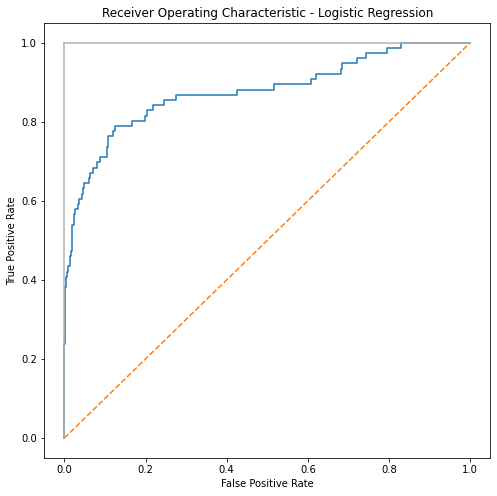

In [19]:
plt.subplots(1, figsize=(8,8))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
np.array(y_valid)[np.argsort(pred_lr[:,1])][-20:].mean()

0.5

Parmi les 20 articles que nous prédisons comme étant les plus susceptibles d'être interdits aux moins de 18 ans, la moitié le sont effectivement. Nous pouvons regarder dans le détail le titre de ces articles. 

In [36]:
np.array(data_valid[['title', 'over_18']])[np.argsort(pred_lr[:,1])][-20:]

array([['SRI LANKA: Victim of brutal police torture tells his story in a video — Asian Human Rights Commission',
        False],
       ['Leaked info on 22000 ISIS fighters, dead fighter pics, and other details [Arabic] [NSFL]',
        True],
       ['Prisoners in Venezuela Eating Stray Cats to Survive [NSFL Warning: Video]',
        True],
       ['Shocking video shows Isis hanging prisoners from meat hooks, cutting them like goats and sheep.',
        False],
       ['Topless FEMEN protesters give a bemused Putin an eyeful in Hanover (nsfw video)...',
        True],
       ['Dozens of protesters arrested in clashes across Egypt (PHOTOS, VIDEO)',
        False],
       ['Jihadists execute seven in Syria, two by crucifixion (x-post r/LevantineWar)',
        False],
       ['Syrian rebels  beheaded Christian and fed him to dogs  | THE AUSTRALIAN',
        False],
       ['IRAQ - American objects. Photographer KAI PFAFFENBACH (REUTERS) (67 photos)',
        False],
       ['Kiev attempt

The titles of these articles seem quite consistent with what one imagines violent articles to be. Even articles not labeled as 'over 18' seem particularly violent. We can conclude that our system seems reasonable. 

## IV. Another small experiment 

Using a transformer trained to classify the positivity of sentences, we can see if trends in terms of positivity in articles emerge over time, perhaps as a function of world events. 

In [ ]:
# Load sentiment classifier
classifier = pipeline('sentiment-analysis')

In [ ]:
data['date_created_temp'] = data['date_created'].apply(lambda x: x[:7])

In [ ]:
days = data['date_created'].unique()
average_sentiment_by_day = []

for i, day in enumerate(days):
    sentiments = classifier(list(data['title'][data['date_created'] == day]))
    positivity_score = 0
    
    for sentiment in sentiments:
        if sentiment['label'] == 'POSITIVE':
            positivity_score += sentiment['score']
        else : 
            positivity_score += 1 - sentiment['score']
    if i % 250 == 0:
        print("{} / {}".format(i, len(days)))
        np.save(path + 'average_sentiment_by_day.npy', average_sentiment_by_day)

    average_sentiment_by_day.append(positivity_score / len(sentiments))

In [ ]:
average_sentiment_by_day = np.load(path + 'average_sentiment_by_day.npy')

In [ ]:
sentiment_data = pd.Series(average_sentiment_by_day, index = days)

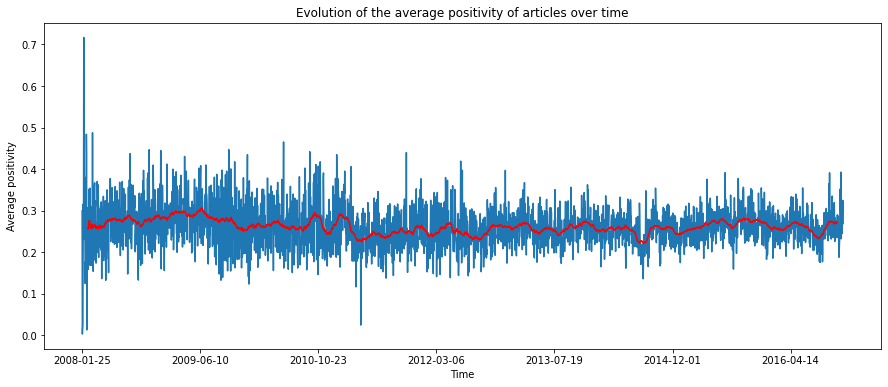

In [ ]:
# Plot average_sentiment_by_day

plt.figure(figsize = (15,6))
sentiment_data.plot()
sentiment_data.rolling(window=50, center=True).mean().plot(c='red')
plt.title("Evolution of the average positivity of articles over time")
plt.xlabel("Time")
plt.ylabel("Average positivity")
plt.show()

There is no clear trend. It is difficult to know if the observed fluctuations are random or due to world events. For example, we can see a fairly significant drop in positivity by a few days towards the end of 2014. We can try to look at the most used words in the headlines during this period. 

In [ ]:
sentiment_data.index[sentiment_data.rolling(window=50, center=True).mean() < 0.225]

Index(['2014-07-09', '2014-07-10', '2014-07-11', '2014-07-12', '2014-07-13',
       '2014-07-14', '2014-07-15', '2014-07-16', '2014-07-27', '2014-07-28',
       '2014-07-29', '2014-07-30', '2014-07-31', '2014-08-01', '2014-08-02',
       '2014-08-03', '2014-08-04', '2014-08-05', '2014-08-06', '2014-08-07',
       '2014-08-09', '2014-08-10', '2014-08-11', '2014-08-12'],
      dtype='object')

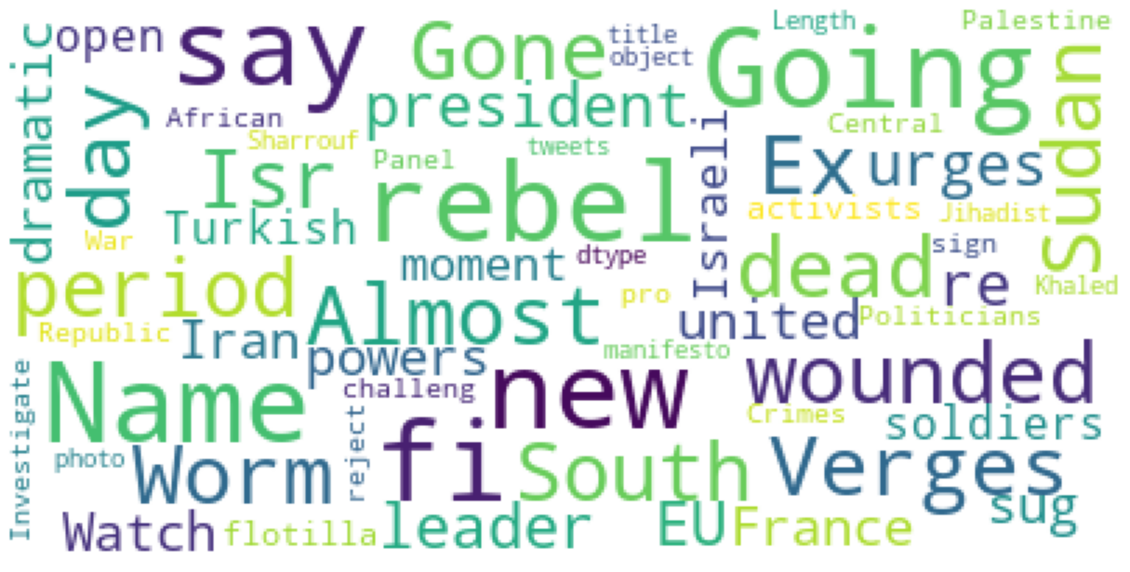

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#Create a word cloud
stopwords1 = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords1, max_words=500,
                      max_font_size=40, random_state=42).generate(str(data['title'][((data['date_created'] > '2014-07-09') & (data['date_created'] < '2014-08-12'))]))
fig = plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

I could not identify a clear cause for this one-time drop in positivity. It is possible that it is just due to random fluctuations. 